# 1) Python configuration and Data Loading

In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


# 2) Data Partitioning

* (a) For the MNIST dataset, write code that sets aside 10,000 training images as a validation set.

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
mnist_data = io.loadmat("data/mnist_data.mat")

In [40]:
X_mnist_train, X_mnist_valid, y_mnist_train, y_mnist_valid = train_test_split(mnist_data['training_data'], mnist_data['training_labels'], test_size=10000, random_state=42)

print(len(X_mnist_valid), 'images in the validation set.')
print(len(X_mnist_train), 'images in the training set.')

10000 images in the validation set.
50000 images in the training set.


* (b) For the spam dataset, write code that sets aside 20% of the training data as a validation set.

In [3]:
spam_data = io.loadmat("data/spam_data.mat")

In [4]:
X_spam_train, X_spam_valid, y_spam_train, y_spam_valid = train_test_split(spam_data['training_data'], spam_data['training_labels'], test_size=0.2, random_state=42)

print(len(X_spam_valid), 'images in the validation set.')
print(len(X_spam_train), 'images in the training set.')

1035 images in the validation set.
4137 images in the training set.


* (c) For the CIFAR-10 dataset, write code that sets aside 5,000 training images as a validation set. Be sure to shuffle your data before splitting it to make sure all the classes are represented in your partitions. Note: Make sure that you shuffle the labels with the training images. It’s a very common error to mislabel the training images by forgetting to permute the labels with the images!

In [3]:
cifar10_data = io.loadmat("data/cifar10_data.mat")

In [4]:
X_cifar10_train, X_cifar10_valid, y_cifar10_train, y_cifar10_valid = train_test_split(cifar10_data['training_data'], cifar10_data['training_labels'], test_size=5000, random_state=42)

print(len(X_cifar10_valid), 'images in the validation set.')
print(len(X_cifar10_train), 'images in the training set.')

5000 images in the validation set.
45000 images in the training set.


Note: `sklearn.model_selection.train_test_split` shuffles the data before splitting by default. See [documentation.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

# 3) Support Vector Machines: Coding

* (a) For the MNIST dataset, use raw pixels as features. Train your model with the following numbers of training examples: 100, 200, 500, 1,000, 2,000, 5,000, 10,000. At this stage, you should expect accuracies between 70% and 90%.
Hint: Be consistent with any preprocessing you do. Use either integer values between 0 and 255 or floating-point values between 0 and 1. Training on floats and then testing with integers is bound to cause trouble.

In [5]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [10]:
clf = LinearSVC(random_state=0, tol=1e-5)

y_mnist_valid_pred = []
y_mnist_train_pred = []
sample_size = [100, 200, 500, 1000, 2000, 5000, 10000]
for n in sample_size:
    clf.fit(X_mnist_train[:n], y_mnist_train[:n])
    y_mnist_valid_pred.append(clf.predict(X_mnist_valid))
    y_mnist_train_pred.append(clf.predict(X_mnist_train))

In [11]:
mnist_valid_score = []
mnist_train_score = []
for n in range(len(sample_size)):
    mnist_valid_score.append(accuracy_score(y_mnist_valid, y_mnist_valid_pred[n]))
    mnist_train_score.append(accuracy_score(y_mnist_train, y_mnist_train_pred[n]))

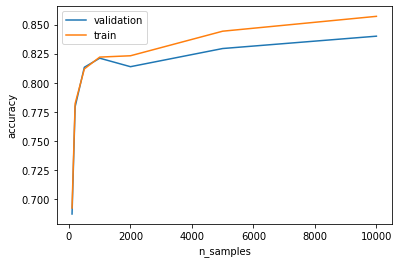

In [12]:
plt.plot(sample_size, mnist_valid_score, label='validation')
plt.plot(sample_size, mnist_train_score, label='train')
plt.legend()
plt.xlabel('n_samples')
plt.ylabel('accuracy')
plt.show()

* (b) For the spam dataset, use the provided word frequencies as features. In other words, each document is represented by a vector, where the ith entry denotes the number of times word i (as specified in featurize.py) is found in that document. Train your model with the following numbers of training examples: 100, 200, 500, 1,000, 2,000, ALL. Note that this dataset does not have 10,000 examples; use all of your examples instead of 10,000. At this stage, you should expect accuracies between 70% and 90%.

In [13]:
clf = LinearSVC(random_state=0, tol=1e-5)

y_spam_valid_pred = []
y_spam_train_pred = []
sample_size = [100, 200, 500, 1000, 2000, 5000, len(spam_data['training_data'])]
for n in sample_size:
    clf.fit(X_spam_train[:n], y_spam_train[:n])
    y_spam_valid_pred.append(clf.predict(X_spam_valid))
    y_spam_train_pred.append(clf.predict(X_spam_train))

In [14]:
spam_valid_score = []
spam_train_score = []
for n in range(len(sample_size)):
    spam_valid_score.append(accuracy_score(y_spam_valid, y_spam_valid_pred[n]))
    spam_train_score.append(accuracy_score(y_spam_train, y_spam_train_pred[n]))

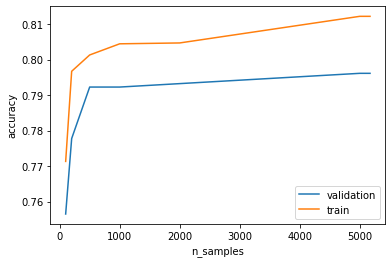

In [15]:
plt.plot(sample_size, spam_valid_score, label='validation')
plt.plot(sample_size, spam_train_score, label='train')
plt.legend()
plt.xlabel('n_samples')
plt.ylabel('accuracy')
plt.show()

* (c) For the CIFAR-10 dataset, use raw pixels as features. At this stage, you should expect accura- cies between 25% and 35%. Be forewarned that training SVMs for CIFAR-10 takes a couple minutes to run for a large training set locally. Train your model with the following numbers of training examples: 100, 200, 500, 1,000, 2,000, 5,000.
Note: We find that SVC(kernel=’linear’) is faster than LinearSVC.

In [83]:
clf = LinearSVC(random_state=0, tol=1e-5)

y_cifar10_valid_pred = []
y_cifar10_train_pred = []
sample_size = [100, 200, 500, 1000, 2000, 5000]
for n in sample_size:
    clf.fit(X_cifar10_train[:n], y_cifar10_train[:n])
    y_cifar10_valid_pred.append(clf.predict(X_cifar10_valid))
    y_cifar10_train_pred.append(clf.predict(X_cifar10_train))

KeyboardInterrupt: 

In [ ]:
cifar10_valid_score = []
cifar10_train_score = []
for n in range(len(sample_size)):
    cifar10_valid_score.append(accuracy_score(y_cifar10_valid, y_cifar10_valid_pred[n]))
    cifar10_train_score.append(accuracy_score(y_cifar10_train, y_cifar10_train_pred[n]))

In [ ]:
plt.plot(sample_size, cifar10_valid_score, label='validation')
plt.plot(sample_size, cifar10_train_score, label='train')
plt.legend()
plt.xlabel('n_samples')
plt.ylabel('accuracy')
plt.show()

# 4) Hyperparameter Tuning

* (a) For the MNIST dataset, find the best C value. In your report, list at least 8 C values you tried, the corresponding accuracies, and the best C value. As in the previous problem, for performance reasons, you are required to train with up to 10,000 training examples but not required to train with more than that.

In [19]:
C_value = list(np.linspace(5e-8,9e-7,20))
n = 10000

y_mnist_valid_pred = []
y_mnist_train_pred = []
for C in C_value:
    clf = LinearSVC(random_state=0, tol=1e-5, C = C)
    clf.fit(X_mnist_train[:n], y_mnist_train[:n])
    y_mnist_valid_pred.append(clf.predict(X_mnist_valid))
    y_mnist_train_pred.append(clf.predict(X_mnist_train))

In [20]:
mnist_valid_score = []
mnist_train_score = []
for n in range(len(C_value)):
    mnist_valid_score.append(accuracy_score(y_mnist_valid, y_mnist_valid_pred[n]))
    mnist_train_score.append(accuracy_score(y_mnist_train, y_mnist_train_pred[n]))

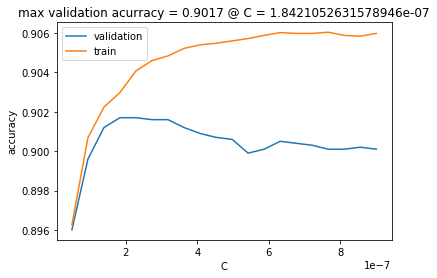

tried C values : [5e-08, 9.473684210526316e-08, 1.3947368421052632e-07, 1.8421052631578946e-07, 2.2894736842105262e-07, 2.736842105263158e-07, 3.184210526315789e-07, 3.631578947368421e-07, 4.0789473684210524e-07, 4.526315789473684e-07, 4.973684210526316e-07, 5.421052631578948e-07, 5.868421052631579e-07, 6.31578947368421e-07, 6.763157894736841e-07, 7.210526315789474e-07, 7.657894736842105e-07, 8.105263157894736e-07, 8.552631578947367e-07, 9e-07]


In [21]:
plt.plot(C_value, mnist_valid_score, label='validation')
plt.plot(C_value, mnist_train_score, label='train')
plt.legend()
plt.title('max validation acurracy = ' + str(max(mnist_valid_score)) + ' @ C = ' + str(C_value[mnist_valid_score.index(max(mnist_valid_score))]))
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

print('tried C values : ' + str([i for i in C_value]))

# 5) K-Fold Cross-Validation

In [22]:
import random

In [23]:
from sklearn.utils import shuffle

In [24]:
spam_shuffled = shuffle(spam_data['training_data'], spam_data['training_labels'], random_state=42)

In [25]:
C_value = list(np.linspace(0.2,6,50))
splits = 5
slice_idx = len(spam_shuffled[0])//splits

spam_valid_score = []
spam_train_score = []
for C in C_value:
    
    spam_valid_accuracy = []
    spam_train_accuracy = []
    
    for n in range(splits):
        X_spam = np.roll(spam_shuffled[0],n*slice_idx)
        y_spam = np.roll(spam_shuffled[1],n*slice_idx)

        X_spam_train, X_spam_valid, y_spam_train, y_spam_valid = train_test_split(X_spam, y_spam, test_size=1/splits, random_state=42, shuffle=False)
       
        clf = LinearSVC(random_state=0, tol=1e-5, C = C)
        clf.fit(X_spam_train, y_spam_train)
        y_spam_valid_pred = clf.predict(X_spam_valid)
        y_spam_train_pred = clf.predict(X_spam_train)
        
        spam_valid_accuracy.append(accuracy_score(y_spam_valid, y_spam_valid_pred))
        spam_train_accuracy.append(accuracy_score(y_spam_train, y_spam_train_pred))

    spam_valid_score.append(np.mean(spam_valid_accuracy))
    spam_train_score.append(np.mean(spam_train_accuracy))

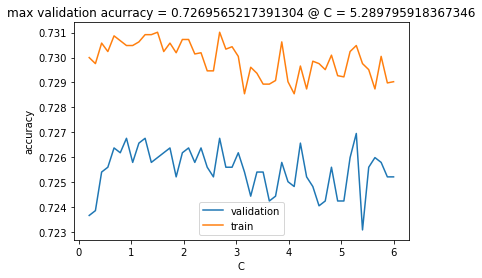

tried C values : [0.2, 0.3183673469387755, 0.43673469387755104, 0.5551020408163265, 0.673469387755102, 0.7918367346938775, 0.9102040816326531, 1.0285714285714285, 1.146938775510204, 1.2653061224489794, 1.383673469387755, 1.5020408163265304, 1.620408163265306, 1.7387755102040814, 1.857142857142857, 1.9755102040816324, 2.093877551020408, 2.2122448979591836, 2.330612244897959, 2.4489795918367347, 2.5673469387755103, 2.6857142857142855, 2.804081632653061, 2.9224489795918367, 3.0408163265306123, 3.159183673469388, 3.277551020408163, 3.3959183673469386, 3.5142857142857142, 3.63265306122449, 3.751020408163265, 3.8693877551020406, 3.987755102040816, 4.106122448979591, 4.224489795918367, 4.3428571428571425, 4.461224489795918, 4.579591836734694, 4.697959183673469, 4.816326530612245, 4.9346938775510205, 5.053061224489796, 5.171428571428571, 5.289795918367346, 5.408163265306122, 5.526530612244898, 5.644897959183673, 5.763265306122449, 5.881632653061224, 6.0]


In [26]:
plt.plot(C_value, spam_valid_score, label='validation')
plt.plot(C_value, spam_train_score, label='train')
plt.legend()
plt.title('max validation acurracy = ' + str(max(spam_valid_score)) + ' @ C = ' + str(C_value[spam_valid_score.index(max(spam_valid_score))]))
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

print('tried C values : ' + str([i for i in C_value]))

# 6) Kaggle

* MNIST Competition: https://www.kaggle.com/t/38eaa18e7d154cae8b8957a4d39b1ac3

In [77]:
#clf = LinearSVC(random_state=0, tol=1e-5, C=1.8421052631578946e-07)

from sklearn.svm import SVC

clf = SVC(random_state=0, tol=1e-5, C=1.6515151515151515e-07, kernel='poly', degree=2) # use poly kernel

clf.fit(X_mnist_train, y_mnist_train)
y_mnist_valid_pred = clf.predict(X_mnist_valid)
accuracy_score(y_mnist_valid, y_mnist_valid_pred)

0.9824

In [78]:
X_mnist_test = mnist_data['test_data']

In [80]:
y_spam_test_pred = clf.predict(X_mnist_test)

In [81]:
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
#import numpy as np

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission_mnist.csv', index_label='Id')


In [82]:
results_to_csv(y_spam_test_pred)

* SPAM Competition: https://www.kaggle.com/t/76ac7336b3d04cdabefda13299102cc6

In [27]:

y_spam_valid_pred = []
y_spam_train_pred = []
C_value = np.linspace(0.001,200,100)
for C in C_value:
    clf = LinearSVC(random_state=0, tol=1e-5, C=C)
    clf.fit(X_spam_train, y_spam_train)
    y_spam_valid_pred.append(clf.predict(X_spam_valid))
    y_spam_train_pred.append(clf.predict(X_spam_train))

In [28]:
spam_valid_score = []
spam_train_score = []
for n in range(len(C_value)):
    spam_valid_score.append(accuracy_score(y_spam_valid, y_spam_valid_pred[n]))
    spam_train_score.append(accuracy_score(y_spam_train, y_spam_train_pred[n]))

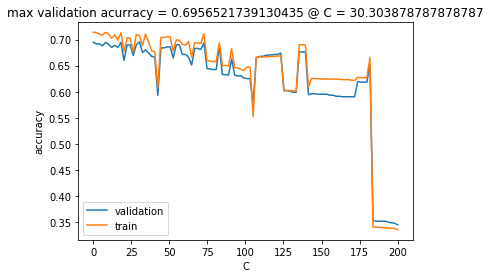

tried C values : [0.001, 2.021191919191919, 4.0413838383838385, 6.061575757575757, 8.081767676767676, 10.101959595959595, 12.122151515151513, 14.142343434343433, 16.162535353535354, 18.182727272727274, 20.202919191919193, 22.223111111111113, 24.24330303030303, 26.263494949494948, 28.283686868686868, 30.303878787878787, 32.3240707070707, 34.34426262626262, 36.36445454545454, 38.38464646464646, 40.40483838383838, 42.4250303030303, 44.44522222222222, 46.465414141414136, 48.48560606060605, 50.505797979797975, 52.52598989898989, 54.546181818181815, 56.56637373737373, 58.586565656565654, 60.60675757575757, 62.62694949494949, 64.64714141414142, 66.66733333333333, 68.68752525252525, 70.70771717171718, 72.7279090909091, 74.74810101010101, 76.76829292929293, 78.78848484848486, 80.80867676767677, 82.82886868686869, 84.8490606060606, 86.86925252525252, 88.88944444444445, 90.90963636363637, 92.92982828282828, 94.9500202020202, 96.97021212121211, 98.99040404040404, 101.01059595959596, 103.0307878787

In [29]:
plt.plot(C_value, spam_valid_score, label='validation')
plt.plot(C_value, spam_train_score, label='train')
plt.legend()
plt.title('max validation acurracy = ' + str(max(spam_valid_score)) + ' @ C = ' + str(C_value[spam_valid_score.index(max(spam_valid_score))]))
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

print('tried C values : ' + str([i for i in C_value]))

In [30]:
X_spam_test = spam_data['test_data']

In [31]:
C = 5.289795918367346
    
clf = LinearSVC(random_state=0, tol=1e-5, C=C)
clf.fit(X_spam_train, y_spam_train)
y_spam_test_pred = clf.predict(X_spam_test)


In [34]:
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
#import numpy as np

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission_spam.csv', index_label='Id')


In [35]:
results_to_csv(y_spam_test_pred)

* CIFAR-10 Competition: https://www.kaggle.com/t/475825f6a31740f8bece23c85db57693

In [61]:
#clf = LinearSVC(random_state=0, tol=1e-5)

from sklearn.svm import SVC
import time

clf = SVC(random_state=0, C=1, kernel='linear', tol=1) # use poly kernel
time_a = time.time()
clf.fit(X_cifar10_train[:200], y_cifar10_train[:200])
y_cifar10_valid_pred = clf.predict(X_cifar10_valid)
time_b = time.time()
print(accuracy_score(y_cifar10_valid, y_cifar10_valid_pred))
print(time_b - time_a)

0.275
2.8184080123901367


In [73]:
X_cifar10_test = cifar10_data['test_data']
y_cifar10_test_pred = clf.predict(X_cifar10_test)

In [74]:
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
#import numpy as np

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission_cifar10.csv', index_label='Id')

In [75]:
results_to_csv(y_cifar10_test_pred)